### Linear Regression and Boston Data Set

- Load Boston Data Set from `sklearn.datasets`, use 

```
from sklearn.datasets import load_boston
boston = load_boston()
```
- Assign `data` to `X` and `target` to `y`


In [44]:
from sklearn.datasets import load_boston
boston = load_boston()
import pandas as pd
print(boston)

from sklearn.datasets import load_boston
boston = load_boston()
from sklearn.model_selection import train_test_split
X = boston.data
y = boston.target


{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [51]:
bostondf = pd.DataFrame(boston.data, columns=boston.feature_names)
bostondf.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [72]:
boston['MEDV'] = boston.target

- the shape of the dataset

In [4]:
print(X.shape, "SHAPE OF X_train")
print(y.shape, "SHAPE OF y_train)")

(506, 13) SHAPE OF X_train
(506,) SHAPE OF y_train)


- Plot the scatter plot of each attribute versus `MEDV`
- by using the starter code below

```
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
  ```

KeyError: 'CRIM'

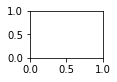

In [69]:
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 5))

features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT']
target  = boston['MEDV'] 


for i, col in enumerate(features):
    plt.subplot(5, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(X, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')
    
# https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

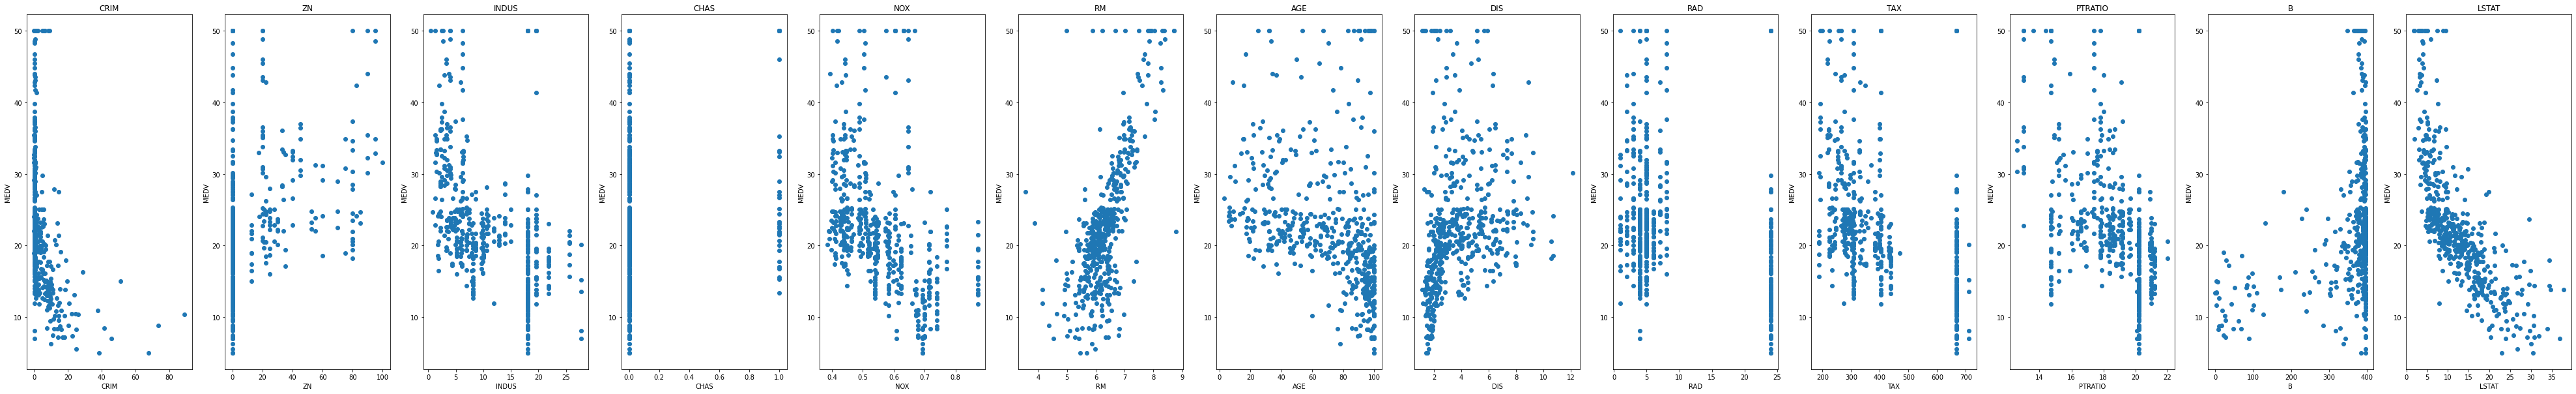

In [74]:
features= boston.feature_names
target=boston['MEDV']
plt.figure(figsize=(70, 10))
for i,col in enumerate(features):
	plt.subplot(1,len(features),i+1)
	x=bostondf[col]
	y=boston.target
	plt.scatter(x,y,marker='o')
	plt.title(col)
	plt.xlabel(col)
	plt.ylabel('MEDV')
plt.show()
# ref: https://www.kaggle.com/code/alexandrecazals/sklearn-boston-housing-dataset/notebook

- Split the dataset into test and train datasets; set the random seed to 42 by `random_state=42`

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state = 42)

- run cross validation for the train and test datasets for `cv=10`
- print the mean score for the cross validation using linear regressor (`LinearRegressor()`)
- do the same two steps above for random forest regressor. For that it can be import from
```
from sklearn.ensemble import RandomForestRegressor
```

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
model1 = LinearRegression()
scores = cross_val_score(model1, X_train,y_train, cv=10)
print("Individual Scores:", scores)
print("Mean Score:", scores.mean())
print("Standard deviation:", scores.std())


Individual Scores: [0.76040301 0.74845486 0.72766357 0.58955767 0.75625201 0.83893833
 0.68798589 0.82421544 0.67268132 0.67606919]
Mean: 0.7282221283702048
Standard deviation: 0.07096143253338301


In [29]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor()
scores = cross_val_score(model2, X_train,y_train,cv=10)
print("Individual Scores:", scores)
print("Mean Score:", scores.mean())
print("Standard deviation:", scores.std())

# ref: https://digitalmind.io/post/train-test-split-and-cross-validation
# https://olegleyz.github.io/boston_housing.html

Individual Scores: [0.88512875 0.88254715 0.9094262  0.89199509 0.85338047 0.91945406
 0.59075091 0.94201542 0.68791531 0.77534934]
Mean Score: 0.8337962703139468
Standard deviation: 0.10831398268027864


## Boston Housing Data with Polynomials

- Transform the Boston House dataset and split the dataset into test and train datasets
- Run cross validation
- Plot the coefficients of the model

In [30]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler, scale
from sklearn.impute import SimpleImputer
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

trans=Pipeline([
            ("poly", PolynomialFeatures(include_bias=False)),
            ("imputer", SimpleImputer()),
            ("scale", StandardScaler())
        ])
boston = load_boston()
X, y = boston.data, boston.target
#X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_poly_train = trans.fit_transform(X_train)
X_poly_test = trans.transform(X_test)
print(X_poly_train.shape)
# https://colab.research.google.com/github/ds4m/ds4m.github.io/blob/master/chapter-8-resources/boston-dataset-example.ipynb

(379, 104)


In [32]:
import numpy as np
np.mean(cross_val_score(LinearRegression(), X_poly_train, y_train, cv=10))

0.8065194743873981

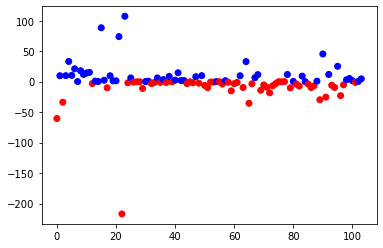

In [34]:
lr = LinearRegression().fit(X_poly_train, y_train)
plt.scatter(range(X_poly_train.shape[1]), lr.coef_, c=np.sign(lr.coef_), cmap="bwr_r")
plt.show()